#Coding Assignment U4A1
Principal Component Analysis - Iris Flower
Author: Gowtham Iyer

In [114]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Importing the dataset

In [116]:
# Importing the dataset
dataset = pd.read_csv('/content/iris.csv')


In [117]:
print(dataset.shape)

(150, 5)


## Separating Featureset from the Target

In [95]:
X = dataset.drop(columns='class_of_iris')
print(X.shape)
y = dataset['class_of_iris']
print(y.shape)

(150, 4)
(150,)


# Standardization of data

In [97]:
# Finding Mean
X_mean = X.mean()

# Finding Standard deviation
X_standard_dev = X.std()

# Standardization
Z = (X - X_mean) / X_standard_dev

# Finding Covariance matrix

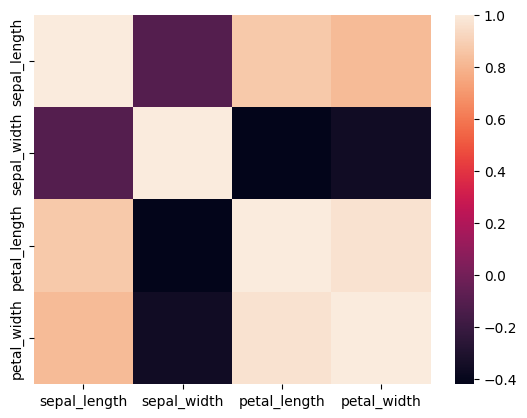

In [98]:
# Finding Covariance
covariance_matrix = Z.cov()

# Plot the covariance matrix
sns.heatmap(covariance_matrix)
plt.show()

# Computing Eigenvectors and Eigenvalues for the feature space

In [99]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('Eigen values:\n', eigenvalues)
print('Shape of Eigen values:', eigenvalues.shape)
print('Shape of Eigen Vector:', eigenvectors.shape)

Eigen values:
 [2.91081808 0.92122093 0.14735328 0.02060771]
Shape of Eigen values: (4,)
Shape of Eigen Vector: (4, 4)


# Sorting Eigenvalues and corresponding Eigenvectors in descending order

In [100]:
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

print('Eigen values:\n', eigenvalues)
print('Eigen vectors:\n', eigenvectors)

Eigen values:
 [2.91081808 0.92122093 0.14735328 0.02060771]
Eigen vectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


# Finding Variance

In [101]:
variance_array = np.cumsum(eigenvalues) / np.sum(eigenvalues)
print(variance_array)
#variance_array

# Ordering the variance in descending order to select top 3
idx = variance_array.argsort()[::-1]

# Sort the eigenvalues in descending order
variance_array_des = variance_array[idx]
print(variance_array_des)
eigenvectors_des = eigenvectors[:,idx]
print(eigenvectors_des)
print("Variance of top 3 PCA components")
print(variance_array_des[0], variance_array_des[1], variance_array_des[2])

[0.72770452 0.95800975 0.99484807 1.        ]
[1.         0.99484807 0.95800975 0.72770452]
[[ 0.26199559 -0.72101681 -0.37231836  0.52237162]
 [-0.12413481  0.24203288 -0.92555649 -0.26335492]
 [-0.80115427  0.14089226 -0.02109478  0.58125401]
 [ 0.52354627  0.6338014  -0.06541577  0.56561105]]
Variance of top 3 PCA components
1.0 0.9948480731910939 0.9580097536148199


# Variance bar plots of top 3 PCA components

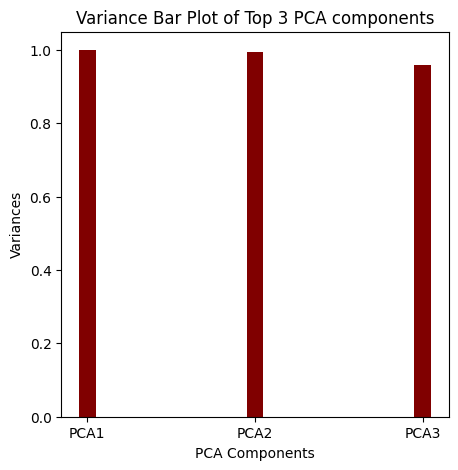

In [102]:
PCA_tags = ['PCA1', 'PCA2', 'PCA3']
variance = list(variance_array_des)
variance.pop(3)
fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(PCA_tags, variance, color ='maroon',
        width = 0.1)

plt.xlabel("PCA Components")
plt.ylabel("Variances")
plt.title("Variance Bar Plot of Top 3 PCA components")
plt.show()

# Setting number of components to 3 (of top 3 variance values)

In [103]:
n_components = 3
n_components

3

                   PC1       PC2       PC3
sepal_length  0.522372 -0.372318 -0.721017
sepal_width  -0.263355 -0.925556  0.242033
petal_length  0.581254 -0.021095  0.140892
petal_width   0.565611 -0.065416  0.633801


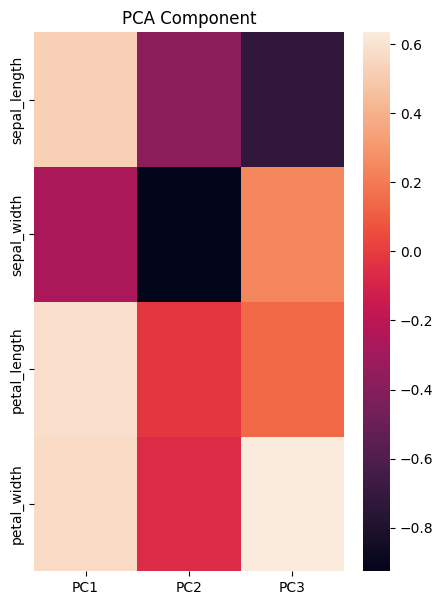

In [104]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = X.columns,
                             columns = ['PC1','PC2','PC3']
                            )
print(pca_component)
# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

# Projecting the dataset in lower dimension

In [105]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2','PC3': 'PCA3' }, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)

         PCA1      PCA2      PCA3
0   -2.764907 -0.487883  0.337705
1   -2.630902  0.935149  0.188937
2   -2.184972 -1.883668 -0.467913
3   -2.203737  0.183722 -0.217895
4   -2.360044  0.317414  0.051308
..        ...       ...       ...
145  1.574879 -1.068894  0.940243
146  2.009425 -0.608359  0.424493
147  1.995008 -1.045049  0.627168
148  1.841503 -0.868786  0.999413
149  2.259983 -1.915027  0.391207

[150 rows x 3 columns]


# Plotting the components


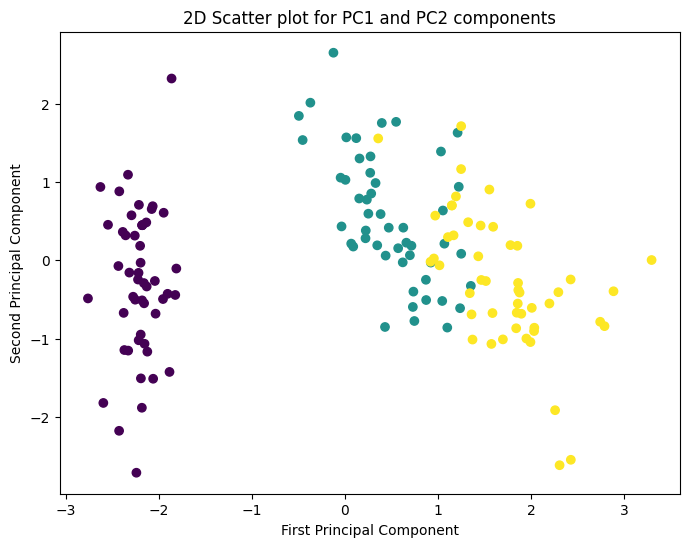

In [106]:
plt.figure(figsize=(8, 6))

label_encoder = preprocessing.LabelEncoder()
y_label_encoder = label_encoder.fit_transform(y)

plt.scatter(Z_pca.values[:, 0], Z_pca.values[:, 1], c = y_label_encoder, cmap='viridis')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D Scatter plot for PC1 and PC2 components')
plt.show()

# Finding PCA using Using Sklearn

In [107]:
# Importing PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
					columns=['PC{}'.
					format(i+1)
						for i in range(n_components)])
print(df_pca1)

          PC1       PC2       PC3
0   -2.764907  0.487883  0.337705
1   -2.630902 -0.935149  0.188937
2   -2.184972  1.883668 -0.467913
3   -2.203737 -0.183722 -0.217895
4   -2.360044 -0.317414  0.051308
..        ...       ...       ...
145  1.574879  1.068894  0.940243
146  2.009425  0.608359  0.424493
147  1.995008  1.045049  0.627168
148  1.841503  0.868786  0.999413
149  2.259983  1.915027  0.391207

[150 rows x 3 columns]


# Plotting the components - Results from Sklearn package




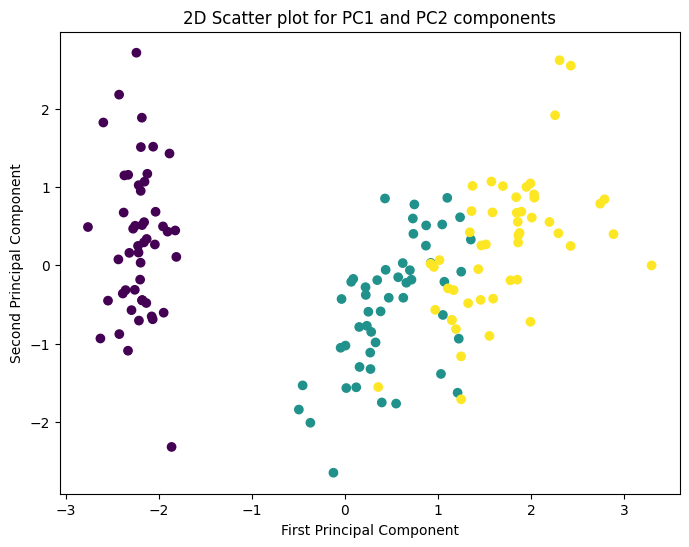

In [108]:
plt.figure(figsize=(8, 6))

label_encoder = preprocessing.LabelEncoder()
y_label_encoder = label_encoder.fit_transform(y)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = y_label_encoder, cmap='viridis')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D Scatter plot for PC1 and PC2 components')
plt.show()

## Creating and evaluating Logistic Regression model for PC1 Component



In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = dataset.drop(columns='class_of_iris')
X_PC1 = x_pca[:, 0]
y = dataset['class_of_iris']

label_encoder = preprocessing.LabelEncoder()
y_label_encoder = label_encoder.fit_transform(y)

#print(X_PC1.shape)
#print(y_label_encoder.shape)

X_train, X_test, y_train, y_test = train_test_split(X_PC1, y_label_encoder,
                                                    test_size=0.3, random_state=0)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

#print(X_train.shape)
#print(y_train.shape)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Evalutation metrics')
y_pred = logreg.predict(X_test)
print('Accuracy of test set: {:.2f}'.format(logreg.score(X_test, y_test)))

report_PC1 = classification_report(y_test, y_pred)
print(report_PC1)

Evalutation metrics
Accuracy of test set: 0.89
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.82      0.85        17
           2       0.77      0.83      0.80        12

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45



## Creating and evaluating Logistic Regression model for PC1 and PC2 compoents

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = dataset.drop(columns='class_of_iris')

X_PC1_PC2 = np.delete(x_pca, 2, 1)
#print(X_PC1_PC2)
y = dataset['class_of_iris']

scaler = StandardScaler();
scaled_features = scaler.fit_transform(X_PC1_PC2);

label_encoder = preprocessing.LabelEncoder()
y_label_encoder = label_encoder.fit_transform(y)

#print(scaled_features.shape)
#print(y_label_encoder.shape)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(scaled_features, y_label_encoder,
                                                    test_size=0.3, random_state=0)

#print(X_train_1.shape)
#print(y_train_1.shape)

logreg = LogisticRegression()
logreg.fit(X_train_1, y_train_1)

print('Evalutation metrics')
y_pred_1 = logreg.predict(X_test_1)
print('Accuracy of test set: {:.2f}'.format(logreg.score(X_test_1, y_test_1)))

report_PC1_PC2 = classification_report(y_test_1, y_pred_1)
print(report_PC1_PC2)

Evalutation metrics
Accuracy of test set: 0.89
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.82      0.85        17
           2       0.77      0.83      0.80        12

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45



## Creating and evaluating Logistic Regression model for two features - sepal_width, sepal_length

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_Sepal = dataset.drop(['petal_length','petal_width','class_of_iris'], axis=1)
#print(X)
y = dataset['class_of_iris']

scaler = StandardScaler();
scaled_features_2 = scaler.fit_transform(X_Sepal);

label_encoder = preprocessing.LabelEncoder()
y_label_encoder = label_encoder.fit_transform(y)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(scaled_features_2, y_label_encoder,
                                                    test_size=0.3, random_state=0)

#X_train = X_train_2.reshape(-1,1)
#X_test = X_test_2.reshape(-1,1)

logreg = LogisticRegression()
logreg.fit(X_train_2, y_train_2)

print('Evalutation metrics')
y_pred_2 = logreg.predict(X_test_2)
print('Accuracy of test set: {:.2f}'.format(logreg.score(X_test_2, y_test_2)))

report_sepal = classification_report(y_test_2, y_pred_2)
print(report_sepal)

Evalutation metrics
Accuracy of test set: 0.84
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.81      0.76      0.79        17
           2       0.69      0.75      0.72        12

    accuracy                           0.84        45
   macro avg       0.83      0.84      0.84        45
weighted avg       0.85      0.84      0.85        45

